In [1]:
from itertools import combinations

import numpy as np
import pandas as pd
import difflib
import json

import networkx as nx
import warnings
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
g = nx.read_edgelist('/Users/Cava/Desktop/University/Data Science & Business Informatics/Social Network Analysis/Project/network_07_12_2020_18_00.csv', data=(('weight',int),('industry',int)), delimiter=",")

In [3]:
nodes = {}
for node in g.nodes():
    nodes[node] = g.edges(node)

In [4]:
def get_edge_data(edge):
    return g.get_edge_data(edge[0], edge[1])

In [5]:
nodes

{'PERMASTEELISA': EdgeDataView([('PERMASTEELISA', 'SALINI SPA'), ('PERMASTEELISA', 'YOOX NET-A-PORTER GROUP'), ('PERMASTEELISA', 'SOMEC SPA'), ('PERMASTEELISA', 'RIZZANI DE ECCHER'), ('PERMASTEELISA', 'RAZORFISH HEALTHWARE'), ('PERMASTEELISA', 'TMD FRICTION ESCO GMBH'), ('PERMASTEELISA', 'BENETTON GROUP SPA'), ('PERMASTEELISA', 'BLUE FORM STUDIO SRL'), ('PERMASTEELISA', 'BLUESTEEL SRL'), ('PERMASTEELISA', 'ACCENTURE'), ('PERMASTEELISA', 'FINCANTIERI SPA'), ('PERMASTEELISA', 'H3G')]),
 'SALINI SPA': EdgeDataView([('SALINI SPA', 'PERMASTEELISA'), ('SALINI SPA', 'FREELANCE'), ('SALINI SPA', 'MAIRE TECNIMONT SPA'), ('SALINI SPA', 'ABB'), ('SALINI SPA', 'RENCO SPA'), ('SALINI SPA', 'COOPERATIVA MURATORI E CEMENTISTI DI RAVENNA'), ('SALINI SPA', 'POLITECNICO DI MILANO'), ('SALINI SPA', 'GRUPPO GENERALI SPA'), ('SALINI SPA', 'ACCENTURE'), ('SALINI SPA', 'ENEL'), ('SALINI SPA', 'PWC SPA'), ('SALINI SPA', 'ALITALIA SPA'), ('SALINI SPA', 'GRUPPO FIAT'), ('SALINI SPA', 'FINCANTIERI SPA'), ('SALIN

In [6]:
for node, edges in nodes.items():
    industry = []
    for link in edges:
        edge_data = get_edge_data(link)
    
        #weight = edge_data['weight']
        industry.append(edge_data['industry'])
    nodes[node] = sorted(set(industry))

In [7]:
nodes

{'PERMASTEELISA': [4, 6, 11, 50, 135, 137, 141],
 'SALINI SPA': [5, 11, 41, 43, 48, 135, 137],
 'YOOX NET-A-PORTER GROUP': [4,
  6,
  11,
  27,
  41,
  42,
  43,
  80,
  96,
  98,
  116,
  135,
  137,
  141],
 'SOMEC SPA': [135],
 'RIZZANI DE ECCHER': [11, 48, 135],
 'RAZORFISH HEALTHWARE': [4],
 'TMD FRICTION ESCO GMBH': [4],
 'BENETTON GROUP SPA': [6, 8, 11, 27, 41, 42, 80, 96, 98, 116, 137, 141],
 'BLUE FORM STUDIO SRL': [50],
 'BLUESTEEL SRL': [50],
 'ACCENTURE': [3,
  4,
  5,
  6,
  8,
  11,
  27,
  34,
  41,
  42,
  43,
  45,
  80,
  96,
  97,
  98,
  116,
  135,
  137,
  141],
 'FINCANTIERI SPA': [11, 43, 50, 116, 135, 137],
 'H3G': [3, 4, 5, 6, 8, 11, 27, 34, 41, 42, 43, 80, 96, 98, 116, 137, 141],
 'FREELANCE': [3,
  4,
  5,
  6,
  8,
  11,
  27,
  34,
  41,
  42,
  43,
  45,
  48,
  50,
  70,
  80,
  96,
  97,
  98,
  116,
  135,
  137,
  141],
 'MAIRE TECNIMONT SPA': [6, 11, 41, 43, 48, 98, 116, 135, 141],
 'ABB': [3, 6, 8, 11, 34, 41, 48, 96, 97, 98, 116, 135, 137, 141],
 '

In [8]:
a = []
for node, edges in nodes.items():
    edges = list(edges)

    a.append(list(combinations(edges,2)))

In [9]:
couples = []

for x in a:
    for coppia in x:
        couples.append(coppia)

In [10]:
mat = {}
for x in couples: 
    mat[x] = couples.count(x)

In [11]:
sorted(mat.items(), key=lambda x: x[1])

[((48, 70), 9),
 ((48, 97), 10),
 ((27, 70), 11),
 ((34, 70), 11),
 ((50, 97), 15),
 ((34, 48), 17),
 ((50, 70), 18),
 ((70, 97), 18),
 ((5, 97), 19),
 ((3, 48), 19),
 ((3, 50), 19),
 ((34, 50), 19),
 ((70, 135), 19),
 ((3, 97), 20),
 ((34, 97), 22),
 ((45, 48), 22),
 ((45, 70), 23),
 ((3, 34), 24),
 ((3, 70), 24),
 ((45, 50), 24),
 ((5, 48), 25),
 ((70, 116), 25),
 ((3, 45), 26),
 ((97, 135), 26),
 ((48, 50), 26),
 ((5, 70), 27),
 ((27, 48), 27),
 ((3, 27), 28),
 ((27, 97), 30),
 ((34, 45), 30),
 ((45, 97), 30),
 ((48, 80), 30),
 ((5, 34), 31),
 ((70, 80), 31),
 ((5, 27), 33),
 ((4, 48), 33),
 ((5, 50), 33),
 ((97, 116), 34),
 ((50, 135), 35),
 ((5, 45), 35),
 ((41, 70), 36),
 ((42, 70), 36),
 ((6, 70), 38),
 ((48, 98), 38),
 ((6, 48), 40),
 ((42, 48), 40),
 ((34, 135), 41),
 ((27, 50), 41),
 ((70, 98), 41),
 ((41, 48), 42),
 ((3, 42), 42),
 ((97, 141), 42),
 ((4, 50), 43),
 ((43, 48), 43),
 ((42, 50), 43),
 ((43, 70), 43),
 ((50, 80), 43),
 ((70, 141), 44),
 ((4, 97), 45),
 ((8, 97),

In [12]:
values = []

for x, y, in sorted(mat.items()):
    values.append(y)

In [13]:
matrix = []

matrix.append(values[0:22])
matrix.append(values[22:43])
matrix.append(values[43:63])
matrix.append(values[63:82])
matrix.append(values[82:100])
matrix.append(values[100:117])
matrix.append(values[117:133])
matrix.append(values[133:148])
matrix.append(values[148:162])
matrix.append(values[162:175])
matrix.append(values[175:187])
matrix.append(values[187:198])
matrix.append(values[198:208])
matrix.append(values[208:217])
matrix.append(values[217:225])
matrix.append(values[225:232])
matrix.append(values[232:238])
matrix.append(values[238:243])
matrix.append(values[243:247])
matrix.append(values[247:250])
matrix.append(values[250:252])
matrix.append(values[252:253])

In [14]:
matrix

[[110,
  61,
  79,
  98,
  96,
  28,
  24,
  58,
  42,
  69,
  26,
  19,
  19,
  24,
  57,
  148,
  20,
  46,
  64,
  57,
  71,
  63],
 [112,
  209,
  229,
  306,
  73,
  48,
  197,
  161,
  221,
  88,
  33,
  43,
  46,
  135,
  497,
  45,
  107,
  115,
  100,
  198,
  123],
 [92,
  139,
  127,
  33,
  31,
  83,
  73,
  90,
  35,
  25,
  33,
  27,
  67,
  171,
  19,
  65,
  68,
  57,
  101,
  68],
 [212,
  305,
  112,
  71,
  182,
  154,
  211,
  78,
  40,
  51,
  38,
  266,
  296,
  50,
  163,
  141,
  101,
  221,
  158],
 [320,
  79,
  51,
  195,
  151,
  213,
  83,
  47,
  54,
  45,
  151,
  385,
  45,
  147,
  127,
  107,
  225,
  134],
 [146,
  98,
  440,
  326,
  489,
  192,
  67,
  89,
  74,
  301,
  546,
  83,
  260,
  250,
  178,
  447,
  277],
 [46, 88, 87, 95, 50, 27, 41, 11, 102, 111, 30, 80, 112, 60, 142, 110],
 [60, 51, 52, 30, 17, 19, 11, 72, 65, 22, 45, 57, 41, 76, 69],
 [305, 561, 246, 42, 50, 36, 160, 313, 50, 146, 132, 94, 244, 166],
 [301, 144, 40, 43, 36, 138, 230,

In [15]:
for i in range(0,22):
    x = 22 - len(matrix[i])
    for j in np.repeat(0, x):
        matrix[i].append(j)

In [16]:
matrix = pd.read_csv('matrix.csv', sep = ';')

In [17]:
matrix.drop('Unnamed: 0', inplace=True, axis=1)

In [18]:
matrix = matrix.fillna(value=0)

In [19]:
A = matrix.values

In [20]:
import numpy as np
W = np.maximum( A, A.transpose() )

In [21]:
final_matrix = pd.DataFrame(W, columns = [3, 4, 5, 6, 8, 11, 27, 34, 41, 42, 43, 45, 48, 50, 70, 80, 96, 97, 98, 116, 135, 137, 141], index = [3, 4, 5, 6, 8, 11, 27, 34, 41, 42, 43, 45, 48, 50, 70, 80, 96, 97, 98, 116, 135, 137, 141])

In [22]:
final_matrix = final_matrix.astype(int)

In [23]:
final_matrix

,3,4,5,6,8,11,27,34,41,42,...,50,70,80,96,97,98,116,135,137,141
3,0,110,61,79,98,96,28,24,58,42,...,19,24,57,148,20,46,64,57,71,63
4,110,0,112,209,229,306,73,48,197,161,...,43,46,135,497,45,107,115,100,198,123
5,61,112,0,92,139,127,33,31,83,73,...,33,27,67,171,19,65,68,57,101,68
6,79,209,92,0,212,305,112,71,182,154,...,51,38,266,296,50,163,141,101,221,158
8,98,229,139,212,0,320,79,51,195,151,...,54,45,151,385,45,147,127,107,225,134
11,96,306,127,305,320,0,146,98,440,326,...,89,74,301,546,83,260,250,178,447,277
27,28,73,33,112,79,146,0,46,88,87,...,41,11,102,111,30,80,112,60,142,110
34,24,48,31,71,51,98,46,0,60,51,...,19,11,72,65,22,45,57,41,76,69
41,58,197,83,182,195,440,88,60,0,305,...,50,36,160,313,50,146,132,94,244,166
42,42,161,73,154,151,326,87,51,305,0,...,43,36,138,230,47,134,116,83,220,145


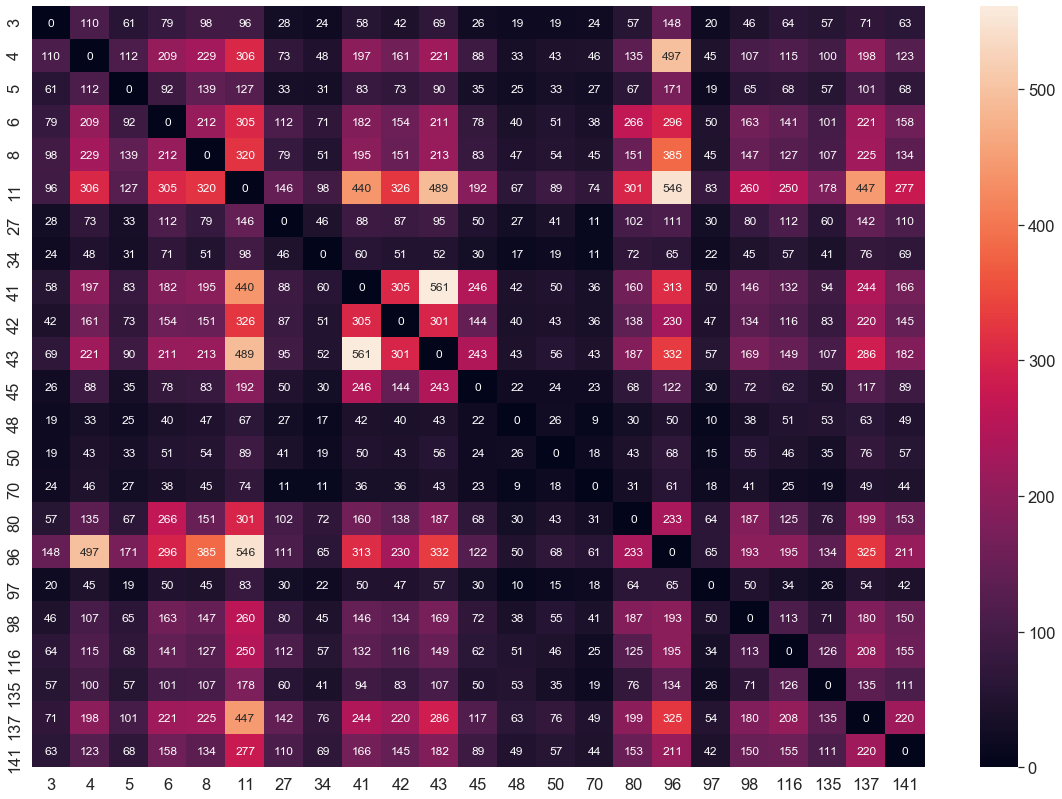

In [24]:
#l'idea è di riscrivere questo dizionario in forma di matrice per poi ricavare una correlation matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))
sn.set(font_scale=1.5) # for label size
sn.heatmap(final_matrix, annot=True, annot_kws={"size": 12}, fmt='g') # font size
plt.show()